# Azure notebook for climate change data visualization

This notebook follows steps from here in the [Microsoft Docs/Learn](https://docs.microsoft.com/en-us/learn/modules/analyze-climate-data-with-azure-notebooks/2-upload-data-and-create-scatterplot?source=learn)

In [25]:
import matplotlib.pyplot as mp
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()

## Data import

In [12]:
yearsBase, meansBase = np.loadtxt('5-year-mean-1951-1980.csv', dtype='int,float', delimiter=',', usecols=(0,1), unpack=True)
years, means = np.loadtxt('5-year-mean-1882-2014.csv', dtype='int, float', delimiter=',', usecols=(0,1), unpack=True)

## Inspecting data as scatterplot chart

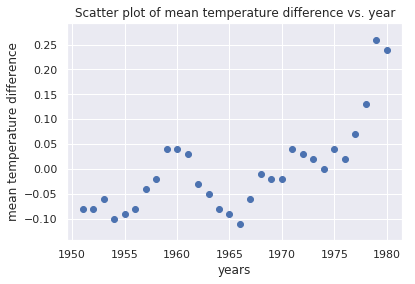

In [27]:
mp.scatter(yearsBase, meansBase)
mp.title('Scatter plot of mean temperature difference vs. year')
mp.xlabel('years', fontsize=12)
mp.ylabel('mean temperature difference', fontsize=12)
mp.show()

## Adding trendline to data

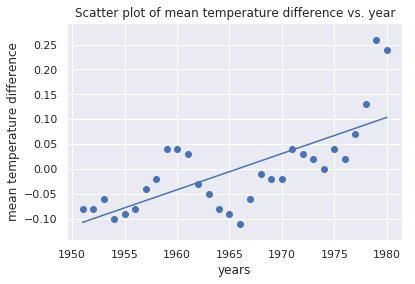

y = 0.007279199110122221 * x + -14.309265850945222


In [32]:
m,c = np.polyfit(yearsBase, meansBase, 1)

def trendline(x):
    return m*x + c

# Plot the scattern diagram along with trend

mp.scatter(yearsBase, meansBase)
mp.plot(yearsBase, trendline(yearsBase))
mp.title('Scatter plot of mean temperature difference vs. year')
mp.xlabel('years', fontsize=12)
mp.ylabel('mean temperature difference', fontsize=12)
mp.show()

print('y = {0} * x + {1}'.format(m,c))